In [5]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy
import re

In [ ]:
Tweet= pandas.read_csv("../input/twitter-airline-sentiment/Tweets.csv")
Tweet.head()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
# 数据清洗

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 
# 将标签转换成数字
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))


In [6]:
import pandas as pd
p_df2 = pd.read_csv('p_df2.csv')


In [7]:
def keepwords(text):
    temp = re.sub('[^a-zA-Z]', ' ', text)
    return temp.lower()

p_df2['user'] = p_df2.user.apply(lambda x: keepwords(x))

In [8]:
p_df2['text_cleaned'] = p_df2[['user', 'text_cleaned']].apply(lambda x: ' '.join(x), axis=1)

In [9]:
p_df2.head()

,Unnamed: 0,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,thespecialone,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thespecialone switchfoot awww bummer you sho...,"[19127, 374, 1122, 39, 3280, 6, 632, 8572, 170...",10,0
1,1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,scotthamilton upset update facebook texting mi...,"[683, 435, 422, 1980, 171, 415, 2102, 70, 7, 1...",11,0
2,2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,mattycus kenichan dived many times ball manage...,"[27392, 67378, 196, 223, 1066, 1434, 763, 32, ...",10,0
3,3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ellectf,my whole body feels itchy and like its on fire,ellectf whole body feels itchy like fire,"[294, 666, 357, 3117, 4, 983]",6,0
4,7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,cozz,@LOLTrish hey long time no see! Yes.. Rains a...,cozz loltrish hey long time see yes rains bit ...,"[111833, 77, 81, 12, 18, 84, 2609, 142, 142, 1...",12,0


In [10]:
#train,test = train_test_split(Tweet,test_size=0.2,random_state=42)
train,test = train_test_split(p_df2,test_size=0.2,random_state=42)

In [11]:
train_clean_tweet = train.text_cleaned.tolist()
test_clean_tweet = test.text_cleaned.tolist()

In [12]:
test.head()
#(0 = negative, 2 = neutral, 4 = positive)

,Unnamed: 0,target,ids,date,flag,user,text,text_cleaned,words,word_length,c2id
539763,755727,0,2288425922,Mon Jun 22 19:08:48 PDT 2009,NO_QUERY,mariantoinett,@jnicole80 going away party I just thought ...,mariantoinett jnicole going away party thought...,"[302915, 9, 128, 185, 143, 600, 13, 123, 101, ...",14,0
159816,224031,0,1977327140,Sat May 30 20:42:31 PDT 2009,NO_QUERY,oneoftherobs,"@KristinaDeFonte I'm so sorry, I just got home...",oneoftherobs kristinadefonte sorry got home li...,"[214481, 57, 6, 25, 4, 418, 314, 17, 235, 51, ...",14,0
11317,15750,0,1554487781,Sat Apr 18 17:07:53 PDT 2009,NO_QUERY,aferomckinney,@allegromoderato Sounds like a great idea! I n...,aferomckinney allegromoderato sounds like grea...,"[181304, 212, 4, 31, 329, 28, 3, 9012, 1076, 7...",14,0
129371,181133,0,1966765733,Fri May 29 18:21:35 PDT 2009,NO_QUERY,tokyofresh,@vickitHU becuz jose is nasty and @chicitydane...,tokyofresh vickithu becuz jose nasty chicityda...,"[123378, 6313, 4541, 1614, 123379, 16370, 171,...",13,0
1041416,1461162,4,2063908495,Sun Jun 07 04:32:34 PDT 2009,NO_QUERY,meganalqueza,"YAY Back home from the mall. man, I'm tired",meganalqueza yay back home mall man tired,"[129, 14, 25, 1082, 109, 105]",6,1


In [ ]:
# 转换成list，方便特征提取
#跳过这一步，上面用大数据及的话这一步跳过
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

[](http://)特征提取：参考文档：https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [17]:
train_features

<911870x709768 sparse matrix of type '<class 'numpy.int64'>'
	with 9057395 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [10]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    XGBClassifier(),
    MLPClassifier(solver='sgd', alpha=1e-5,
       hidden_layer_sizes=(5, 2), random_state=1, max_iter=500),
    GradientBoostingClassifier(random_state=0)
    
]#gpu不能一次性加载这么多模型兵训练

In [19]:
import gc
gc.collect()

8

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    predictions = [round(value) for value in pred]
    accuracy = accuracy_score(test['sentiment'],predictions)
    print(classification_report(test.sentiment,  predictions, labels=[0,2,4]))
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+ ' is: '+str(accuracy))    

In [12]:
#X = p_df2.words.values.tolist()
X= v.fit_transform(p_df2.text_cleaned.tolist())
y = p_df2.target.values.tolist()


In [13]:
y = label_binarize(y, classes=[0, 2, 4])
n_classes = y.shape[1]

In [14]:
n_classes

3

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
X_train.shape

(763691, 811225)

In [37]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [20]:
from sklearn.metrics import roc_auc_score
import numpy as np
test_target = label_binarize(test.target, classes=[0,4])

In [16]:
lr = LogisticRegression(C=0.01,solver='liblinear',max_iter=200)
model = lr.fit(train_features,train['target'])
preds = model.predict(test_features)
probs = model.predict_proba(test_features)
#lr_score = lrmodel.decision_function(test_features)
#predictions = [int(value) for value in preds]

lr_accuracy = accuracy_score(test['target'], preds)


lr_fpr, lr_tpr, theshold = roc_curve(test_target, probs[:,1])
#print(roc_auc_score(test_target, lr_probs[:,1]))
#print(roc_auc_score(test_target, lr_probs[:,0]))
print('ROC-AUC of LR is: ' +  str(auc(lr_fpr, lr_tpr)))
print('Accuracy of LR is: '+ str(lr_accuracy)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('lr_fpr.npy', lr_fpr)
np.save('lr_tpr.npy', lr_tpr)

ROC-AUC of LR is: 0.8391018388057561
Accuracy of LR is: 0.7632255404267265


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.78      0.74      0.76    114395
           2       0.00      0.00      0.00         0
           4       0.75      0.78      0.77    113573

   micro avg       0.76      0.76      0.76    227968
   macro avg       0.51      0.51      0.51    227968
weighted avg       0.76      0.76      0.76    227968



In [21]:
knn = KNeighborsClassifier(2)
model = knn.fit(train_features,train['target'])
preds = model.predict(test_features)
probs = model.predict_proba(test_features)
#lr_score = lrmodel.decision_function(test_features)
#predictions = [round(value) for value in preds]

knn_acc = accuracy_score(test.target, preds)
#test_target = label_binarize(test.target, classes=[0,4])
knn_fpr, knn_tpr, theshold = roc_curve(test_target, probs[:,1])

print('ROC-AUC of KNeighborsClassifier is: ' +  str(auc(knn_fpr, knn_tpr)))
print('Accuracy of KNeighborsClassifier is: '+ str(knn_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('knn_fpr.npy', knn_fpr)
np.save('knn_tpr.npy', knn_tpr)

ROC-AUC of KNeighborsClassifier is: 0.6992176418129339
Accuracy of KNeighborsClassifier is: 0.646077519651881


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.61      0.83      0.70    114395
           2       0.00      0.00      0.00         0
           4       0.73      0.46      0.57    113573

   micro avg       0.65      0.65      0.65    227968
   macro avg       0.45      0.43      0.42    227968
weighted avg       0.67      0.65      0.63    227968



In [23]:
dt = DecisionTreeClassifier()
model = dt.fit(train_features,train['target'])
preds = model.predict(test_features)
probs = model.predict_proba(test_features)
#lr_score = lrmodel.decision_function(test_features)
#predictions = [round(value) for value in preds]

dt_acc = accuracy_score(test.target, preds)
#test_target = label_binarize(test.target, classes=[0,4])
dt_fpr, dt_tpr, theshold = roc_curve(test_target, probs[:,1])

print('ROC-AUC of KNeighborsClassifier is: ' +  str(auc(dt_fpr, dt_tpr)))
print('Accuracy of KNeighborsClassifier is: '+ str(dt_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('dt_fpr.npy', dt_fpr)
np.save('dt_tpr.npy', dt_tpr)

ROC-AUC of KNeighborsClassifier is: 0.7114885076396591
Accuracy of KNeighborsClassifier is: 0.7114331836047164


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.71      0.71      0.71    114395
           2       0.00      0.00      0.00         0
           4       0.71      0.71      0.71    113573

   micro avg       0.71      0.71      0.71    227968
   macro avg       0.47      0.47      0.47    227968
weighted avg       0.71      0.71      0.71    227968



In [17]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=2 )
model = rf.fit(train_features,train['target'])
preds = model.predict(test_features)
probs = model.predict_proba(test_features)
#lr_score = lrmodel.decision_function(test_features)
#predictions = [round(value) for value in preds]

rf_acc = accuracy_score(test.target, preds)
#test_target = label_binarize(test.target, classes=[0,4])
rf_fpr, rf_tpr, theshold = roc_curve(test_target, probs[:,1])

print('ROC-AUC of RandomForestClassifier is: ' +  str(auc(rf_fpr, rf_tpr)))
print('Accuracy of RandomForestClassifier is: '+ str(rf_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('rf_fpr.npy', rf_fpr)
np.save('rf_tpr.npy', rf_tpr)

ROC-AUC of RandomForestClassifier is: 0.7912841533189465
Accuracy of RandomForestClassifier is: 0.6975233366086468


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.65      0.84      0.74    114395
           2       0.00      0.00      0.00         0
           4       0.78      0.55      0.64    113573

   micro avg       0.70      0.70      0.70    227968
   macro avg       0.48      0.46      0.46    227968
weighted avg       0.72      0.70      0.69    227968



In [ ]:
#svc = SVC(kernel="rbf", C=0.025, probability=True)
svc = SVC(kernel='rbf',C=0.01,gamma=0.1)
model = svc.fit(train_features,train['target'])
preds = model.predict(test_features)
probs = model.predict_proba(test_features)

svc_acc = accuracy_score(test.target, preds)

test_target = label_binarize(test.target, classes=[0,4])
svc_fpr, svc_tpr, theshold = roc_curve(test_target, preds)


print('ROC-AUC of SVC is: ' +  str(auc(svc_fpr, svc_tpr)))
print('Accuracy of SVC is: '+ str(svc_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('ada_fpr.npy', ada_fpr)
np.save('ada_tpr.npy', ada_tpr)

In [20]:
ada = AdaBoostClassifier()
model = ada.fit(train_features,train['target'])
preds = model.predict(test_features)
probs = model.predict_proba(test_features)
#lr_score = lrmodel.decision_function(test_features)
#predictions = [round(value) for value in preds]

ada_acc = accuracy_score(test.target, preds)
ada_fpr, ada_tpr, theshold = roc_curve(test_target, preds)


print('ROC-AUC of AdaBoostClassifier is: ' +  str(auc(ada_fpr, ada_tpr)))
print('Accuracy of AdaBoostClassifier is: '+ str(ada_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('ada_fpr.npy', ada_fpr)
np.save('ada_tpr.npy', ada_tpr)

ROC-AUC of AdaBoostClassifier is: 0.6521160491305521
Accuracy of AdaBoostClassifier is: 0.6513370297585626


C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.77      0.44      0.56    114395
           2       0.00      0.00      0.00         0
           4       0.60      0.87      0.71    113573

   micro avg       0.65      0.65      0.65    227968
   macro avg       0.46      0.43      0.42    227968
weighted avg       0.69      0.65      0.63    227968



In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()

gnb = GaussianNB()
model = gnb.fit(dense_features,train['target'])
preds = model.predict(dense_features)
probs = model.predict_proba(dense_features)

gnb_acc = accuracy_score(test.target, preds)

#gnb_score = gnb.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
gnb_fpr, gnb_tpr, theshold = roc_curve(test_target, preds)


print('ROC-AUC of GaussianNB is: ' +  str(auc(gnb_fpr, gnb_tpr)))
print('Accuracy of GaussianNB is: '+ str(gnb_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))
np.save('gnb_fpr.npy', gnb_fpr)
np.save('gnb_tpr.npy', gnb_tpr)

In [ ]:
xfbc = XGBClassifier()
xfbc_model = ada.fit(train_features, train.target)
xfbc_pred = gnb_model.predict(test_features)
predictions = [rount(v) for v in xfbc_pred]
xfbc_acc = accuracy_score(test.target, predictions)

#xfbc_score = xfbc.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
xfbc_fpr, xfbc_tpr, theshold = roc_curve(test_target, predictions)


print('ROC-AUC of XGBClassifier is: ' +  str(auc(gnb_fpr, gnb_tpr)))
print('Accuracy of XGBClassifier is: '+ str(gnb_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [24]:
mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)
model = mlp.fit(train_features,train['target'])
preds = model.predict(train_features)
probs = model.predict_proba(train_features)

mlp_acc = accuracy_score(test.target, preds)
mlp_fpr, mlp_tpr, theshold = roc_curve(test_target, preds)


print('ROC-AUC of MLPClassifier is: ' +  str(auc(mlp_fpr, mlp_tpr)))
print('Accuracy of MLPClassifier is: '+ str(mlp_acc)) 
print(classification_report(test.target, preds, labels=[0,2,4]))

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ValueError: Found input variables with inconsistent numbers of samples: [227968, 911870]

In [ ]:
gbc = GradientBoostingClassifier(random_state=0)
gbc_model = ada.fit(train_features, train.target)
gbc_pred = gnb_model.predict(test_features)
predictions = [rount(v) for v in gbc_pred]
#gbc_acc = accuracy_score(test.target, predictions)

gbc_score = gbc.decision_function(test_features)
#test_target = label_binarize(test.target, classes=[0,4])
gbc_fpr, gbc_tpr, theshold = roc_curve(test_target, predictions)


print('ROC-AUC of GradientBoostingClassifier is: ' +  str(auc(gbc_fpr, gbc_tpr)))
print('Accuracy of GradientBoostingClassifier is: '+ str(gbc_acc)) 
print(classification_report(test.target, predictions, labels=[0,2,4]))

In [ ]:
path = r'\\filestore.soton.ac.uk\users\ly1u19\mydocuments\temp'
knn_fpt

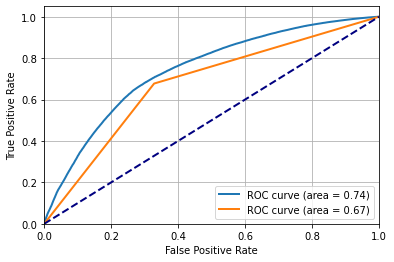

In [30]:
plt.figure()
lw = 2
plt.plot(lr_fpr, lr_tpr, lw=lw, label='ROC curve (area = %0.2f)' % auc(lr_fpr, lr_tpr))
plt.plot(knn_fpr, knn_tpr, lw=lw, label='ROC curve (area = %0.2f)' % auc(knn_fpr, knn_tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
#plt.figure(figsize=(40,250))
sns.factorplot(x="evaluation_type", y="evaluation_value", hue="algorithm_accuracy",
col="sentiment", data=temp, kind="bar", size=6, aspect=.8,legend=False)
plt.legend(loc = 'line',title ='algorithm accuracy')
#plt.grid(True)
plt.show()

In [ ]:
Accuracy.append(accuracy)

## Compare the model performances

In [ ]:
Index = [1,2,3,4,5,6,7,8,9]
plt.bar(Index,Accuracy,alpha=0.9, width = 0.6, 
        facecolor = 'green', edgecolor = 'white' )
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')